# WORKSHOP 002 - NOTEBOOK #2

## Exploratory Data Analysis (EDA) on the Spotify Dataset

In this notebook, we conduct a thorough exploratory analysis of the Spotify dataset, providing a deep understanding of the dataset, including data quality checks, univariate and bivariate analysis, and advanced visualizations to extract meaningful insights.

If some libraries are not recognized when running requirements.txt, run "pip install -r ../requirements.txt" in a code box on the notebook.

In [1]:
pip install -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.


### Import Libraries and Set Up Environment

In [1]:
import os
import sys


try:
    os.chdir("../")  
    print("Directorio de trabajo cambiado a:", os.getcwd())
except FileNotFoundError:
    print("No se pudo cambiar el directorio, verifica la ruta.")

project_root = os.path.abspath(os.path.join(os.getcwd()))
if project_root not in sys.path:
    sys.path.append(project_root)
    
print("sys.path actualizado. Directorio base:", project_root)


Directorio de trabajo cambiado a: /home/juanjoslo/ETL/WorkShop-2
sys.path actualizado. Directorio base: /home/juanjoslo/ETL/WorkShop-2


In [96]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

# Configuración de estilo para los gráficos
sns.set(style='whitegrid', context='notebook')
%matplotlib inline


### Load the Spotify Dataset

In [3]:
spotify_data = pd.read_csv("./Data/spotify_dataset.csv")
spotify_data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
df = spotify_data.drop(columns=["Unnamed: 0"])

## Data preparation: Preprocessing and Cleansing

The Spotify dataset contains a total of 114,000 entries with 20 columns.

**String columns (object type):**
- **track_id**: Unique identifier for each track.  
- **artists**: Names of the artists performing the track.  
- **album_name**: The name of the album where the track is featured.  
- **track_name**: The name of the track.  
- **track_genre**: The genre of the track.  

**Numerical columns (int64 type):**
- **popularity**: Popularity score of the track.  
- **duration_ms**: Duration of the track in milliseconds.  
- **key**: Musical key (represented numerically).  
- **mode**: Mode of the track (major or minor).  
- **time_signature**: Time signature of the track (e.g., 4/4).  

**Boolean column (bool type):**
- **explicit**: Indicates if the track contains explicit content.  

**Decimal columns (float64 type):**
- **danceability**: Represents how suitable the track is for dancing.  
- **energy**: Energy level of the track, indicating its intensity and activity.  
- **loudness**: General volume of the track (in decibels).  
- **speechiness**: Measures the presence of spoken words in the track.  
- **acousticness**: The likelihood that the track is acoustic.  
- **instrumentalness**: Represents how instrumental the track is (with few or no vocals).  
- **liveness**: Indicates the presence of an audience (if it is live).  
- **valence**: Positivity or happiness of the track.  
- **tempo**: The tempo of the track (in beats per minute).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

### Null values

In [6]:
df.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [7]:
df[df['artists'].isnull()]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [8]:
df = df.dropna().reset_index(drop=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113999 entries, 0 to 113998
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  int64  
 6   explicit          113999 non-null  bool   
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           11

In [10]:
df.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

### Duplicated Values

In [11]:
duplicated_values = df.duplicated()
duplicated_values.sum()

450

In [12]:
df.loc[duplicated_values].head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1925,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,False,0.841,0.577,0,-7.544,1,0.0438,0.238000,0.860000,0.0571,0.843,90.522,4,afrobeat
2155,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.900,11,-3.674,1,0.0499,0.116000,0.000017,0.1190,0.599,104.655,4,alt-rock
3738,7mULVp0DJrI2Nd6GesLvxn,Joy Division,Timeless Rock Hits,Love Will Tear Us Apart,0,204621,False,0.524,0.902,2,-8.662,1,0.0368,0.000989,0.695000,0.1370,0.907,146.833,4,alternative
4648,6d3RIvHfVkoOtW1WHXmbX3,Little Symphony,Serenity,Margot,27,45714,False,0.269,0.142,0,-23.695,1,0.0509,0.866000,0.904000,0.1140,0.321,67.872,3,ambient
5769,481beimUiUnMUzSbOAFcUT,SUPER BEAVER,突破口 / 自慢になりたい,突破口,54,255080,False,0.472,0.994,8,-1.786,1,0.1140,0.025900,0.000000,0.0535,0.262,103.512,4,anime


In [14]:
df[df.duplicated(subset=["track_id"])].head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1925,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,False,0.841,0.577,0,-7.544,1,0.0438,0.2380,0.860000,0.0571,0.843,90.522,4,afrobeat
2155,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.900,11,-3.674,1,0.0499,0.1160,0.000017,0.1190,0.599,104.655,4,alt-rock
3000,5E30LdtzQTGqRvNd7l6kG5,The Neighbourhood,Wiped Out!,Daddy Issues,87,260173,False,0.588,0.521,10,-9.461,1,0.0329,0.0678,0.149000,0.1230,0.337,85.012,4,alternative
3002,2K7xn816oNHJZ0aVqdQsha,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,Softcore,86,206280,False,0.575,0.568,9,-5.509,0,0.0300,0.0484,0.000417,0.2860,0.370,93.986,4,alternative
3003,2QjOHCTQ1Jl3zawyYOpxh6,The Neighbourhood,I Love You.,Sweater Weather,93,240400,False,0.612,0.807,10,-2.810,1,0.0336,0.0495,0.017700,0.1010,0.398,124.053,4,alternative


In [15]:
df = df.drop_duplicates()
print(f"After dropping duplicates: {df.shape[0]} rows ")

After dropping duplicates: 113549 rows 


In [16]:
df[df.duplicated(subset=["track_id"])].head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
3000,5E30LdtzQTGqRvNd7l6kG5,The Neighbourhood,Wiped Out!,Daddy Issues,87,260173,False,0.588,0.521,10,-9.461,1,0.0329,0.06780,0.149000,0.1230,0.337,85.012,4,alternative
3002,2K7xn816oNHJZ0aVqdQsha,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,Softcore,86,206280,False,0.575,0.568,9,-5.509,0,0.0300,0.04840,0.000417,0.2860,0.370,93.986,4,alternative
3003,2QjOHCTQ1Jl3zawyYOpxh6,The Neighbourhood,I Love You.,Sweater Weather,93,240400,False,0.612,0.807,10,-2.810,1,0.0336,0.04950,0.017700,0.1010,0.398,124.053,4,alternative
3011,6rrKbzJGGDlSZgLphopS49,The Score,ATLAS,Unstoppable,73,192106,False,0.485,0.843,1,-3.993,0,0.0467,0.00129,0.000010,0.1400,0.602,78.001,4,alternative
3012,0AUyNF6iFxMNQsNx2nhtrw,grandson,Blood // Water,Blood // Water,75,216720,False,0.510,0.882,8,-5.659,0,0.1590,0.00158,0.002060,0.0764,0.653,154.029,4,alternative


In [17]:
df = df.drop_duplicates(subset=["track_id"]).reset_index(drop=True)

In [19]:
df.shape

(89740, 20)

### Duplicated records in track_name and artists column

In [28]:
song_artist_group = df.groupby(["track_name", "artists"])

counts = song_artist_group.size().reset_index(name="group_count").sort_values(by="group_count", ascending=False)

In [30]:
repeated_songs = counts[counts["group_count"] > 1]
repeated_songs.head()

,track_name,artists,group_count
55084,Rockin' Around The Christmas Tree,Brenda Lee,45
37981,Little Saint Nick - 1991 Remix,The Beach Boys,41
55570,Run Rudolph Run,Chuck Berry,40
23998,Frosty The Snowman,Ella Fitzgerald,34
37090,Let It Snow! Let It Snow! Let It Snow!,Dean Martin,32


In [31]:
repeated_songs.shape

(4657, 3)

In [32]:
repeated_songs_data = df

In [33]:
repeated_songs_data.shape

(89740, 20)

In [34]:
repeated_songs_data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### Grouping of genders

In [35]:
repeated_songs_data["track_genre"].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [36]:
genre_mapping = {
    'Rock/Metal': [
        'alt-rock', 'alternative', 'black-metal', 'death-metal', 'emo', 'grindcore',
        'hard-rock', 'hardcore', 'heavy-metal', 'metal', 'metalcore', 'psych-rock',
        'punk-rock', 'punk', 'rock-n-roll', 'rock', 'grunge', 'j-rock', 'goth',
        'industrial', 'rockabilly', 'indie'
    ],
    
    'Pop': [
        'pop', 'indie-pop', 'power-pop', 'k-pop', 'j-pop', 'mandopop', 'cantopop',
        'pop-film', 'j-idol', 'synth-pop'
    ],
    
    'Electronic/Dance': [
        'edm', 'electro', 'electronic', 'house', 'deep-house', 'progressive-house',
        'techno', 'trance', 'dubstep', 'drum-and-bass', 'dub', 'garage', 'idm',
        'club', 'dance', 'minimal-techno', 'detroit-techno', 'chicago-house',
        'breakbeat', 'hardstyle', 'j-dance', 'trip-hop'
    ],
    
    'Urban': [
        'hip-hop', 'r-n-b', 'dancehall', 'reggaeton', 'reggae'
    ],
    
    'Latino': [
        'brazil', 'salsa', 'samba', 'spanish', 'pagode', 'sertanejo',
        'mpb', 'latin', 'latino'
    ],

     'Global Sounds': [
        'indian', 'iranian', 'malay', 'turkish', 'tango', 'afrobeat', 'french', 'german', 'british', 'swedish'
    ],
    
    'Jazz and Soul': [
        'blues', 'bluegrass', 'funk', 'gospel', 'jazz', 'soul', 'groove', 'disco', 'ska'
    ],
    
    'Varied Themes': [
        'children', 'disney', 'forro', 'kids', 'party', 'romance', 'show-tunes',
        'comedy', 'anime'
    ],
    
    'Instrumental': [
        'acoustic', 'classical',  'guitar', 'piano',
        'world-music', 'opera', 'new-age'
    ],
    
    'Mood': [
        'ambient', 'chill', 'happy', 'sad', 'sleep', 'study'
    ],
    
    'Single Genre': [
        'country', 'honky-tonk', 'folk', 'singer-songwriter'
    ]
}

In [37]:
genre_category_mapping = {genre: category for category, genres in genre_mapping.items() for genre in genres}

repeated_songs_data["track_genre"] = repeated_songs_data["track_genre"].map(genre_category_mapping)

In [38]:
repeated_songs_data["track_genre"].unique()

array(['Instrumental', 'Global Sounds', 'Rock/Metal', 'Mood',
       'Varied Themes', 'Jazz and Soul', 'Latino', 'Electronic/Dance',
       'Pop', 'Single Genre', 'Urban'], dtype=object)

In [39]:
subset_cols = [col for col in repeated_songs_data.columns if col not in ['track_name', 'artists', 'track_genre']]

repeated_songs_data = repeated_songs_data.drop_duplicates(subset=subset_cols, keep="first")

repeated_songs_data.shape

(89740, 20)

In [42]:
song_artist_grouped = repeated_songs_data.groupby(["track_name", "artists"])
song_artist_grouped

grouped_counts = (song_artist_grouped
                  .size()
                  .reset_index(name="counts")
                  .sort_values(by="counts", ascending=False))

In [43]:
repeated_songs = grouped_counts.query("counts > 1")
repeated_songs.head(10)

,track_name,artists,counts
55084,Rockin' Around The Christmas Tree,Brenda Lee,45
37981,Little Saint Nick - 1991 Remix,The Beach Boys,41
55570,Run Rudolph Run,Chuck Berry,40
23998,Frosty The Snowman,Ella Fitzgerald,34
37090,Let It Snow! Let It Snow! Let It Snow!,Dean Martin,32
42561,Mistletoe,Justin Bieber,31
59376,Sleigh Ride,Ella Fitzgerald,30
30348,I Saw Mommy Kissing Santa Claus,The Jackson 5,27
64803,The Christmas Song (Merry Christmas To You),Nat King Cole,26
56426,Santa Claus Is Coming To Town,The Jackson 5,26


In [44]:
repeated_songs_data = (repeated_songs_data.sort_values(by='popularity', ascending=False).groupby(['track_name', 'artists']).head(1).sort_index().reset_index(drop=True))
repeated_songs_data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,Instrumental
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,Instrumental
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,Instrumental
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,Instrumental
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,Instrumental


In [45]:
df = repeated_songs_data

In [46]:
df.shape

(81343, 20)

## Song duration

### Milliseconds to minutes



In [49]:
df["duration_min"] = (df["duration_ms"]
                      .apply(lambda x: f"{x // 60000}"))

df["duration_min"] = df["duration_min"].astype(int)

In [50]:
df[["duration_ms", "duration_min"]].head(10)

,duration_ms,duration_min
0,230666,3
1,149610,2
2,210826,3
3,201933,3
4,198853,3
5,214240,3
6,229400,3
7,242946,4
8,189613,3
9,205594,3


#### Grouping the song duration into categories

Categories:

*Short*: Songs with a duration less than 2,5 minutes (150.000 ms).

*Average*: Songs with a duration between 2,5 minutes (150.000 ms) and 5 minutes (300.000 ms).

*Long*: Songs with a duration longer than 5 minutes (300.000 ms).

In [54]:
def categorize_duration(duration_ms):
    if duration_ms < 150000:
        return "Short"
    elif 150000 <= duration_ms <= 300000:
        return "Average"
    else:
        return "Long"

df["duration_category"] = df["duration_ms"].apply(categorize_duration)

df[["duration_ms", "duration_category"]].head()

,duration_ms,duration_category
0,230666,Average
1,149610,Short
2,210826,Average
3,201933,Average
4,198853,Average


#### Grouping popularity into categories

Popularity scores are grouped into three categories:

*Low*: Scores ranging from 0 to 30.

*Medium*: Scores from 31 to 70.

*High*: Scores from 71 to 100.

In [53]:
def categorize_popularity(popularity):
    if popularity <= 30:
        return "Low Popularity"
    elif 31 <= popularity <= 70:
        return "Medium Popularity"
    else:
        return "High Popularity"

df["popularity_category"] = df["popularity"].apply(categorize_popularity)

df[["popularity", "popularity_category"]].head()

,popularity,popularity_category
0,73,High Popularity
1,55,Medium Popularity
2,57,Medium Popularity
3,71,High Popularity
4,82,High Popularity


#### track_mood based on the valence column

Categories for track_mood:

*Sad*: Tracks with a valence value between 0 and 0,3.

*Neutral*: Tracks with a valence value between 0,31 and 0,6.

*Happy*: Tracks with a valence value between 0,61 and 1,0.

In [56]:
def determine_mood(valence):
    if valence <= 0.3:
        return "Sad"
    elif 0.31 <= valence <= 0.6:
        return "Neutral"
    else:
        return "Happy"

df["track_mood"] = df["valence"].apply(determine_mood)

df[["valence", "track_mood"]].head(10)

,valence,track_mood
0,0.7150,Happy
1,0.2670,Sad
2,0.1200,Sad
3,0.1430,Sad
4,0.1670,Sad
5,0.6660,Happy
6,0.0765,Sad
7,0.7120,Happy
8,0.6690,Happy
9,0.1960,Sad


### Create live_performance column

In [57]:
df["live_performance"] = df["liveness"] > 0.8

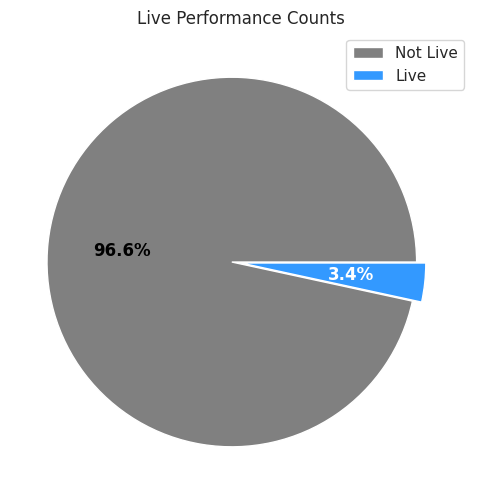

In [62]:
live_performance_counts = df['live_performance'].value_counts()

labels = ['Not Live', 'Live'] if len(live_performance_counts) == 2 else live_performance_counts.index.tolist()

pie = live_performance_counts.plot(kind='pie', 
                                   figsize=(6, 6), 
                                   autopct="%1.1f%%", 
                                   colors=['#808080', '#3399FF'], 
                                   explode=[0.05, 0], 
                                   textprops={'color': 'white', 'fontweight': 'bold'}, 
                                   labeldistance=1.1, 
                                   labels=None)

plt.legend(labels=labels, loc='best')

texts = pie.texts

for i, text in enumerate(texts):
    if i < len(labels) and labels[i] == 'Live':
        text.set_color('black')

plt.ylabel('')
plt.title('Live Performance Counts')

plt.show()


#### Dropping speechiness, acousticness, and instrumentalness columns

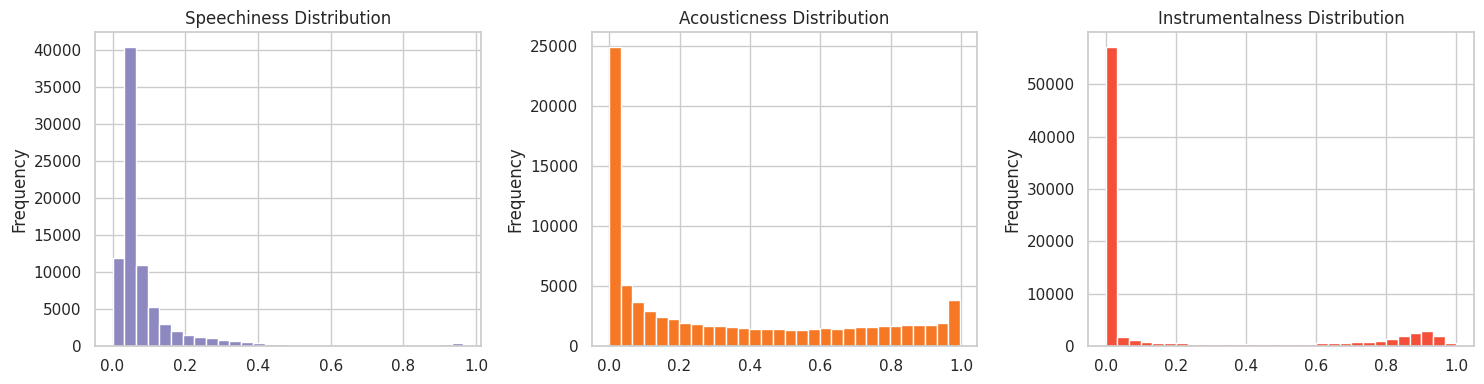

In [67]:
def sns_colors(color):
    return sns.color_palette(color)[3]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Speechiness
df["speechiness"].plot(kind="hist", bins=30, ax=axes[0], color=sns_colors("Purples"), title="Speechiness Distribution")

# Acousticness
df["acousticness"].plot(kind="hist", bins=30, ax=axes[1], color=sns_colors("Oranges"), title="Acousticness Distribution")

# Instrumentalness
df["instrumentalness"].plot(kind="hist", bins=30, ax=axes[2], color=sns_colors("Reds"), title="Instrumentalness Distribution")

plt.tight_layout()
plt.show()


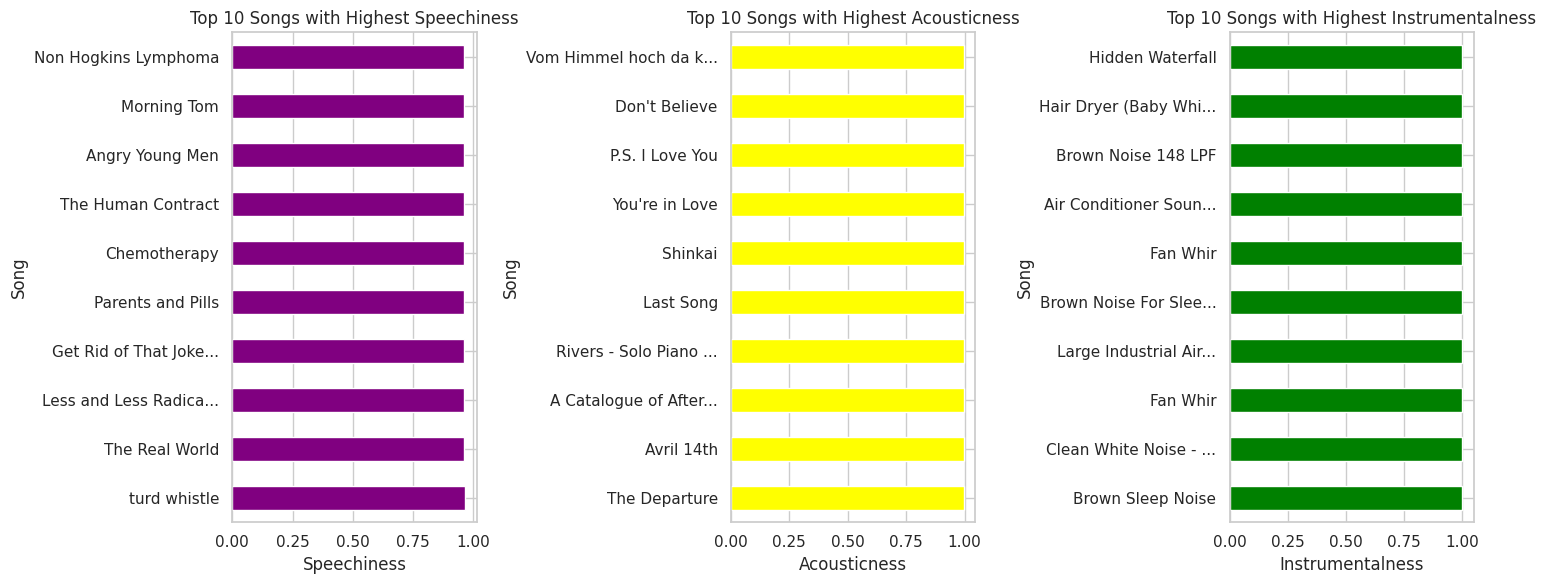

In [73]:
def shorten_title(title, max_length=20):
    if len(title) > max_length:
        return title[:max_length] + '...'
    return title

fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Top 10 songs with highest speechiness
top_speechiness = df.nlargest(10, "speechiness")
top_speechiness["short_track_name"] = top_speechiness["track_name"].apply(shorten_title)
top_speechiness.plot(kind="barh", x="short_track_name", y="speechiness", ax=axes[0], color="purple", legend=False)
axes[0].set_title("Top 10 Songs with Highest Speechiness")
axes[0].set_xlabel("Speechiness")
axes[0].set_ylabel("Song")

# Top 10 songs with highest acousticness
top_acousticness = df.nlargest(10, "acousticness")
top_acousticness["short_track_name"] = top_acousticness["track_name"].apply(shorten_title)
top_acousticness.plot(kind="barh", x="short_track_name", y="acousticness", ax=axes[1], color="yellow", legend=False)
axes[1].set_title("Top 10 Songs with Highest Acousticness")
axes[1].set_xlabel("Acousticness")
axes[1].set_ylabel("Song")

# Top 10 songs with highest instrumentalness
top_instrumentalness = df.nlargest(10, "instrumentalness")
top_instrumentalness["short_track_name"] = top_instrumentalness["track_name"].apply(shorten_title)
top_instrumentalness.plot(kind="barh", x="short_track_name", y="instrumentalness", ax=axes[2], color="green", legend=False)
axes[2].set_title("Top 10 Songs with Highest Instrumentalness")
axes[2].set_xlabel("Instrumentalness")
axes[2].set_ylabel("Song")

plt.tight_layout()
plt.show()


In [74]:
df = df.drop(columns=['speechiness', 'acousticness', 'instrumentalness'])

### Dropping other columns

In [75]:
df = df.drop(columns=["mode", "duration_ms", "key", "tempo", "valence", "liveness", "time_signature"])

In [76]:
df.head(10)

,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,loudness,track_genre,duration_min,duration_category,popularity_category,track_mood,live_performance
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,False,0.676,0.4610,-6.746,Instrumental,3,Average,High Popularity,Happy,False
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,False,0.420,0.1660,-17.235,Instrumental,2,Short,Medium Popularity,Sad,False
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,False,0.438,0.3590,-9.734,Instrumental,3,Average,Medium Popularity,Sad,False
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,False,0.266,0.0596,-18.515,Instrumental,3,Average,High Popularity,Sad,False
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,False,0.618,0.4430,-9.681,Instrumental,3,Average,High Popularity,Sad,False
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,False,0.688,0.4810,-8.807,Instrumental,3,Average,Medium Popularity,Happy,False
6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,False,0.407,0.1470,-8.822,Instrumental,3,Average,High Popularity,Sad,False
7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,False,0.703,0.4440,-9.331,Instrumental,4,Average,High Popularity,Happy,False
8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,False,0.625,0.4140,-8.700,Instrumental,3,Average,High Popularity,Happy,False
9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,False,0.442,0.6320,-6.770,Instrumental,3,Average,Medium Popularity,Sad,False


## Data understanding

#### Popularity Distribution

/home/juanjoslo/ETL/WorkShop-2/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/juanjoslo/ETL/WorkShop-2/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/home/juanjoslo/ETL/WorkShop-2/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.group

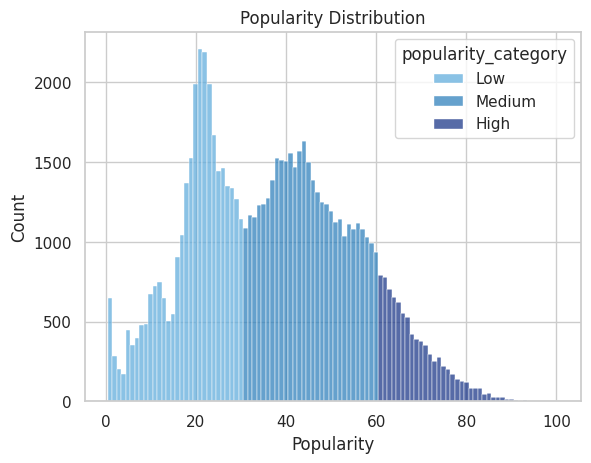

In [ ]:

blue_palette = ['#63AEDD', '#3182BD', '#1E3A8A']

df['popularity_category'] = pd.cut(
    df['popularity'],
    bins=[0, 30, 60, 100],
    labels=['Low', 'Medium', 'High']
)

sns.histplot(
    data=df, 
    x='popularity', 
    hue='popularity_category',
    bins=30, 
    multiple='stack', 
    palette=blue_palette,
    hue_order=['Low', 'Medium', 'High'],
    discrete=True  
)

plt.title('Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

#### Top 10 Popular Songs

In [93]:
popular_songs = (df.query('popularity_category == "High"').reset_index(drop=True).sort_values(by='popularity', ascending=False))

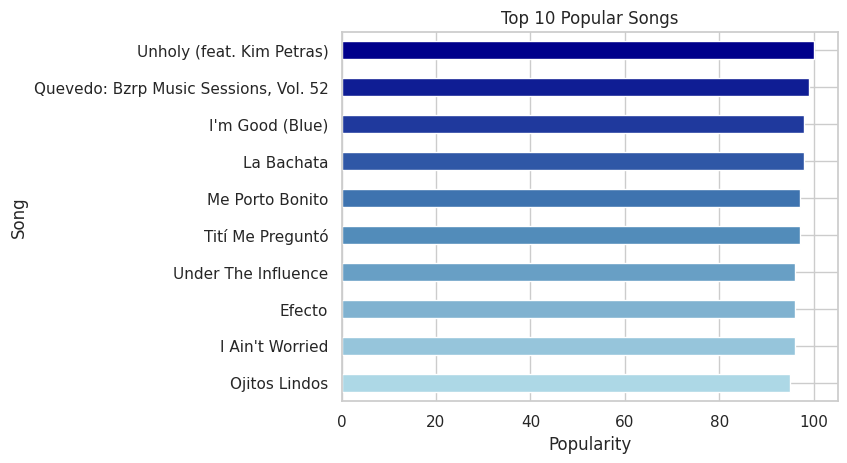

In [97]:


# Data
popular_songs_bar = (popular_songs.head(10).sort_values(by='popularity'))

# Paleta de colores en tonos de azul
light_blue = '#ADD8E6'  
blue = '#4682B4'    
dark_blue = '#00008B'

cmap = LinearSegmentedColormap.from_list('blue_shades', [light_blue, blue, dark_blue])

# Generación de los colores
colours = cmap(np.linspace(0, 1, len(popular_songs_bar)))

# Gráfico de barras horizontales
ax = popular_songs_bar.plot(kind='barh', x='track_name', y='popularity', color=colours, title='Top 10 Popular Songs', legend=False)

# Títulos y etiquetas
plt.xlabel("Popularity")
plt.ylabel("Song")
plt.show()


#### Song Danceability and Energy Distribution

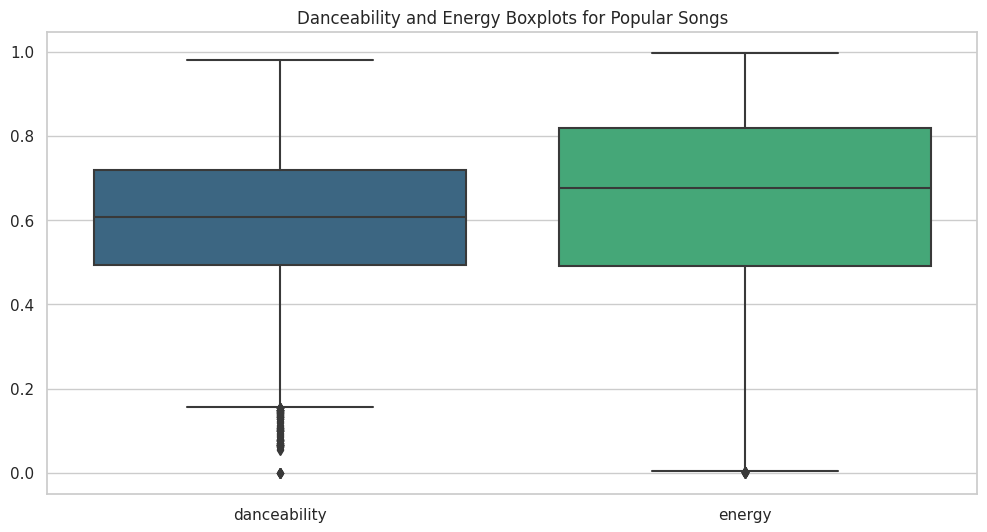

In [98]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=popular_songs[["danceability", "energy"]], palette="viridis")

plt.title("Danceability and Energy Boxplots for Popular Songs")

plt.show()

#### Song Duration Distribution

/home/juanjoslo/ETL/WorkShop-2/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


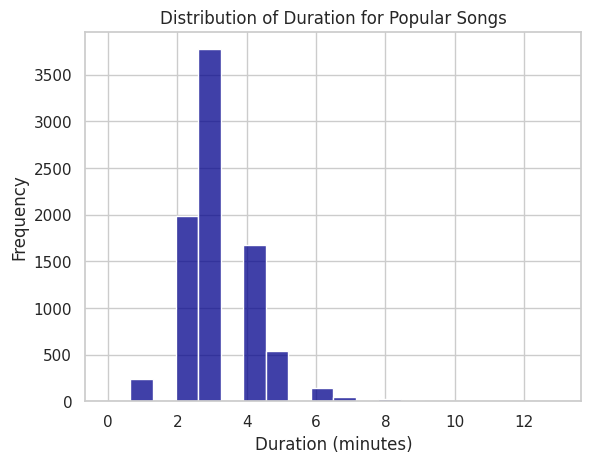

In [100]:
popular_duration_hist = popular_songs.sort_values(by="duration_min")

sns.histplot(data=popular_duration_hist, x="duration_min", multiple="stack", color="#00008B", bins=20)

plt.title("Distribution of Duration for Popular Songs")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")

plt.show()

#### Relationship between  Danceability, Energy and Mood



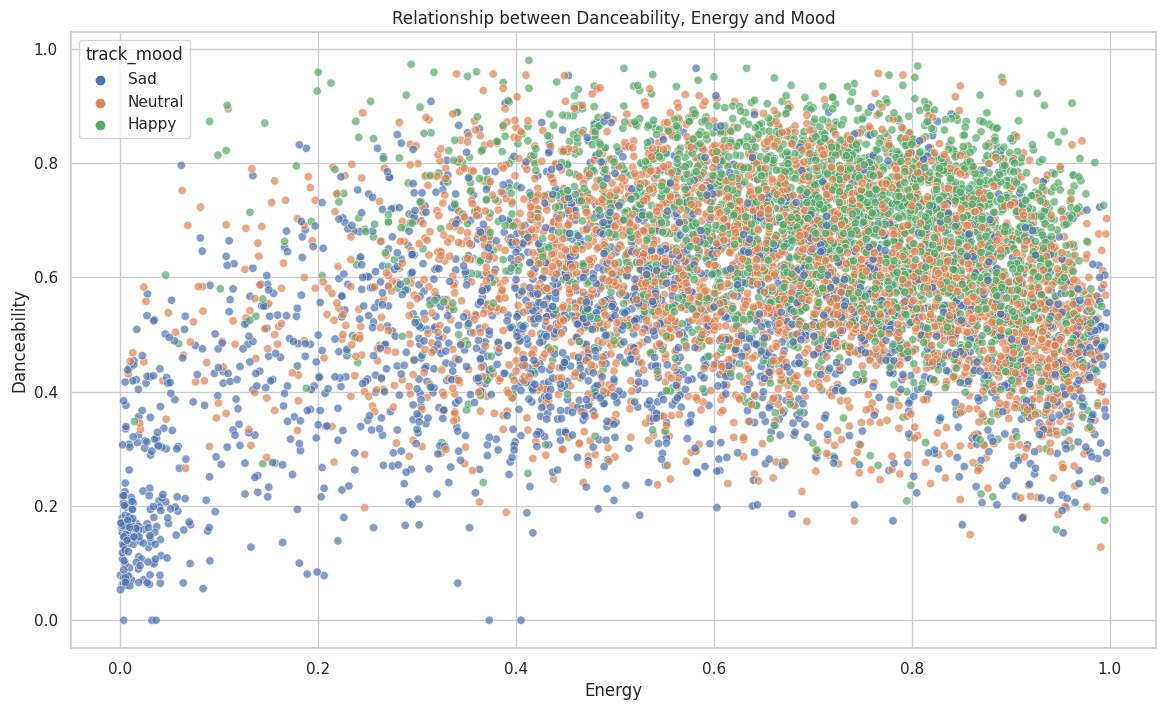

In [101]:
plt.figure(figsize=(14, 8))

sns.scatterplot(data=popular_songs, 
                x='energy', 
                y='danceability', 
                hue='track_mood', 
                alpha=0.7)

plt.title('Relationship between Danceability, Energy and Mood')
plt.xlabel('Energy')
plt.ylabel('Danceability')

plt.legend(title='track_mood')

plt.show()

#### Explicit Songs

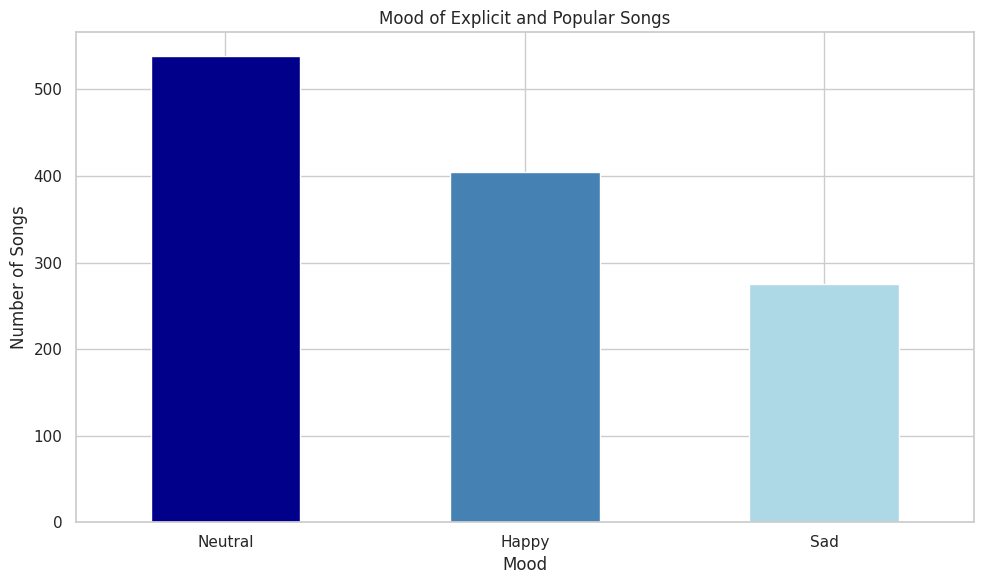

In [102]:
explicit_popular_songs = popular_songs[popular_songs["explicit"] == True]

mood_counts = explicit_popular_songs["track_mood"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))

colours = cmap(np.linspace(1, 0, len(mood_counts)))

mood_counts.plot(kind="bar", color=colours)

plt.title("Mood of Explicit and Popular Songs")
plt.xlabel("Mood")
plt.ylabel("Number of Songs")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

#### Most Popular Genres


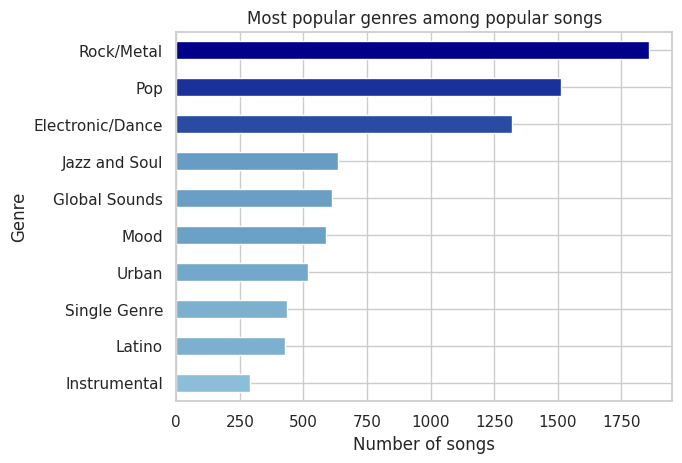

In [103]:
popular_genres = popular_songs['track_genre'].value_counts()

top_genres = popular_genres.head(10).sort_values()

colour_intensities = [value/top_genres.max() for value in top_genres]
custom_colours = cmap(colour_intensities)

top_genres.plot(kind='barh', color=custom_colours, legend=False)

plt.title('Most popular genres among popular songs')
plt.xlabel('Number of songs')
plt.ylabel('Genre')

plt.show()


#### Popularity by genres

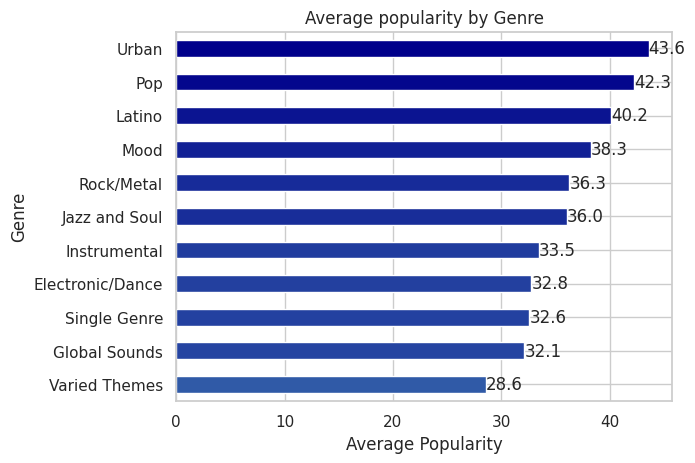

In [104]:
avg_popularity_by_genre = (df.groupby('track_genre')['popularity'].mean().reset_index().sort_values(by='popularity', ascending=True))

popularity_values = avg_popularity_by_genre['popularity']
color_intensities = [value/popularity_values.max() for value in popularity_values]
custom_colours = cmap(color_intensities)

ax = avg_popularity_by_genre.plot(kind='barh', x='track_genre', y='popularity', color=custom_colours, legend=False)

for i in ax.patches:
    ax.annotate(f'{i.get_width():.1f}', (i.get_width(), i.get_y() + i.get_height()/2), 
                ha='left', va='center')


plt.title("Average popularity by Genre")
plt.xlabel("Average Popularity")
plt.ylabel("Genre")

plt.show()

# Conclusions



**Data Cleaning:**

- Removed unnecessary columns such as `Unnamed: 0`, `speechiness`, `acousticness`, `instrumentalness`, `mode`, `duration_ms`, `key`, `tempo`, `valence`, `liveness`, and `time_signature`, as they had low variability or were not relevant for the analysis.
- Eliminated duplicate records based on `track_id` and other criteria, reducing the dataset to approximately 81,000 entries.
- Grouped musical genres into broader categories for easier analysis and better understanding.

**Data Transformations:**

- Created a `duration_min` column to convert song duration from milliseconds to minutes, making it easier to interpret.
- Categorized songs into three duration categories: `Short`, `Average`, and `Long`.
- Grouped songs into popularity categories: `Low`, `Average`, and `High`, to better understand their success.
- Determined the mood of each song (Sad, Neutral, Happy) based on the `valence` column.
- Created a `live_performance` column to distinguish between studio and live recorded songs.

**Popularity Analysis:**

- The most popular songs tend to have high volume levels, ranging from -10 dB to -2.5 dB.
- Most popular songs have a duration between 2 and 4 minutes, indicating a preference for moderate-length tracks.
- Popular songs show high variability in terms of danceability and energy, with median values around 0.65 and 0.7, respectively. "Happy" songs tend to be more energetic and danceable, while "Sad" songs have lower levels in both metrics.
- The most prevalent music genres among popular songs are "Rock/Metal", "Electronic/Dance", and "Pop".
- Despite Rock/Metal and Electronic/Dance being the most frequent genres, Urban, Pop, and Latin genres show the highest average popularity.
- Explicit and popular songs tend to evoke positive emotions, with a predominance of "Neutral" mood songs in this category.

**Visualizations:**

- **Histograms** were used to analyze the distribution of song popularity, duration, and volume levels.
- **Boxplots** were employed to visualize the variability in danceability and energy.
- A **scatter plot** was created to observe the relationship between the mood of the songs and their levels of energy and danceability.
- **Bar charts** were used to show the most common genre categories among popular songs and the average popularity by genre.
- A **bar chart** was created to analyze the mood of explicit and popular songs.
